# Generating a sky map and finding sources

**In this tutorial you will learn how to generate a sky map from the selected events and how to find potential sources in the data.**

As next step you will make a sky map of the selected events to inspect what’s in the data. You do this using the ctskymap tool. 

We start with the usual gammalib, ctools, and cscripts imports.

In [1]:
import gammalib
import ctools
import cscripts

We will use the matplotlib package to display the results.

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

We will use the events selected in the previous step. Since the data correspond to observations of the Crab nebula we should centre the sky map on this source. The energy limits of the sky map should be set to the energy interval of the data (0.66 - 100 TeV). 

In [3]:
obsfile = "obs_crab_selected.xml"
emin = 0.66
emax = 100.

skymap = ctools.ctskymap()
skymap['inobs']       = obsfile
skymap['proj']        = 'CAR'
skymap['coordsys']    = 'CEL'
skymap['xref']        = 83.63
skymap['yref']        = 22.01
skymap['binsz']       = 0.02
skymap['nxpix']       = 200
skymap['nypix']       = 200
skymap['emin']        = emin
skymap['emax']        = emax
skymap['bkgsubtract'] = 'NONE'


skymap.run()

We can visualise the skymap.

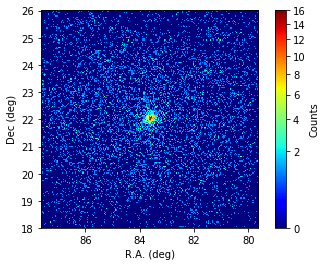

In [4]:
#module used to stretch the color palette
import matplotlib.colors as colors

ax = plt.subplot()
plt.imshow(skymap.skymap().array(),origin='lower',
            extent=[83.63+0.02*200,83.63-0.02*200,22.01-0.02*200,22.01+0.02*200],
            # boundaries of the coord grid
            norm=colors.PowerNorm(gamma=0.5),
            cmap=plt.get_cmap('jet')) # square root scale 
ax.set_xlabel('R.A. (deg)')
ax.set_ylabel('Dec (deg)')
cbar = plt.colorbar()
cbar.set_label('Counts')

Based on the sky map you can now extract a model for all potentially significant sources in the data. You do this using the cssrcdetect script, and to extract only significant sources, you should set the detection threshold for example to 5 sigma. We will make a copy of the skymap since the detection process involves smoothing and we do not want to modify the original map.

In [5]:
srcmodel = 'crab.xml'
regfile = 'crab_sources.ds9'

srcdetect = cscripts.cssrcdetect(skymap.skymap().copy())
srcdetect['srcmodel'] = 'POINT'
srcdetect['bkgmodel'] = 'NONE' # we will determine the background model in a later step
srcdetect['threshold'] = 5
srcdetect['corr_rad'] =  0.1
srcdetect['outmodel'] = srcmodel
srcdetect['outds9file'] = regfile

srcdetect.execute()

Let's look at the resulting model. It contains a point source Src001 at the position of the Crab nebula.

In [6]:
models = gammalib.GModels(srcmodel)
print(models)

=== GModels ===
 Number of models ..........: 1
 Number of parameters ......: 6
=== GModelSky ===
 Name ......................: Src001
 Instruments ...............: all
 Instrument scale factors ..: unity
 Observation identifiers ...: all
 Model type ................: PointSource
 Model components ..........: "PointSource" * "PowerLaw" * "Constant"
 Number of parameters ......: 6
 Number of spatial par's ...: 2
  RA .......................: 83.6192131308071 +/- 0 deg (free,scale=1)
  DEC ......................: 22.0199996472185 +/- 0 deg (free,scale=1)
 Number of spectral par's ..: 3
  Prefactor ................: 5.7e-18 +/- 0 [0,infty[ ph/cm2/s/MeV (free,scale=5.7e-18,gradient)
  Index ....................: -2.48 +/- 0 [10,-10]  (free,scale=-2.48,gradient)
  PivotEnergy ..............: 300000 MeV (fixed,scale=300000,gradient)
 Number of temporal par's ..: 1
  Normalization ............: 1 (relative value) (fixed,scale=1,gradient)


We can overlay the position of the source we found to the smoothed skymap to make sure everything worked well.

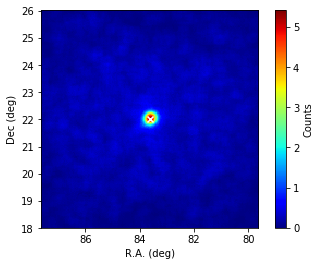

In [7]:
ax1 = plt.subplot()
plt.imshow(srcdetect._map.array(),origin='lower',
            extent=[83.63+0.02*200,83.63-0.02*200,22.01-0.02*200,22.01+0.02*200],
            # boundaries of the coord grid
            cmap=plt.get_cmap('jet')) # square root scale 
ax1.set_xlabel('R.A. (deg)')
ax1.set_ylabel('Dec (deg)')
cbar = plt.colorbar()
cbar.set_label('Counts')

crab = models['Src001']

ax1.scatter(crab['RA'].value(),crab['DEC'].value(),
           marker='x',c='white')